In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sc
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
df = pd.read_csv('auto.csv')
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
#воспользуемся функцией describe()
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
for col in df.columns:
    if(df[col].dtype in ['int64', 'float64']):
        print("\n",col,"\n","\n mean: ", df[col].mean(), "\n medaian: ", np.median(df[col]),\
              "\n mode: ",df[col].mode()[0],"\n max: ",df[col].max(),"\n mode: ",\
              df[col].mode()[0],"\n max: ",df[col].min(), "\n mode: ",df[col].mode()[0],"\n std: ",df[col].std())


 symboling 
 
 mean:  0.8341463414634146 
 medaian:  1.0 
 mode:  0 
 max:  3 
 mode:  0 
 max:  -2 
 mode:  0 
 std:  1.24530682810553

 normalized-losses 
 
 mean:  126.36585365853658 
 medaian:  122.0 
 mode:  161 
 max:  256 
 mode:  161 
 max:  65 
 mode:  161 
 std:  35.43840008889838

 wheel-base 
 
 mean:  98.75658536585378 
 medaian:  97.0 
 mode:  94.5 
 max:  120.9 
 mode:  94.5 
 max:  86.6 
 mode:  94.5 
 std:  6.021775685025572

 length 
 
 mean:  174.04926829268305 
 medaian:  173.2 
 mode:  157.3 
 max:  208.1 
 mode:  157.3 
 max:  141.1 
 mode:  157.3 
 std:  12.337288526555186

 width 
 
 mean:  65.90780487804875 
 medaian:  65.5 
 mode:  63.8 
 max:  72.3 
 mode:  63.8 
 max:  60.3 
 mode:  63.8 
 std:  2.1452038526871817

 height 
 
 mean:  53.724878048780525 
 medaian:  54.1 
 mode:  50.8 
 max:  59.8 
 mode:  50.8 
 max:  47.8 
 mode:  50.8 
 std:  2.4435219699049044

 curb-weight 
 
 mean:  2555.5658536585365 
 medaian:  2414.0 
 mode:  2385 
 max:  4066 
 mode

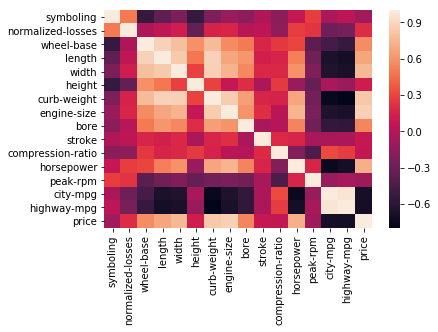

In [5]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

In [6]:
#а можно так
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1,0.5,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.036,0.035,-0.08
normalized-losses,0.5,1,-0.03,0.051,0.12,-0.33,0.15,0.17,0.014,0.039,-0.15,0.27,0.23,-0.29,-0.26,0.2
wheel-base,-0.53,-0.03,1,0.87,0.8,0.59,0.78,0.57,0.5,0.16,0.25,0.3,-0.36,-0.47,-0.54,0.57
length,-0.36,0.051,0.87,1,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.7,0.68
width,-0.23,0.12,0.8,0.84,1,0.28,0.87,0.74,0.56,0.18,0.18,0.6,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1,0.3,0.067,0.2,-0.044,0.26,-0.11,-0.32,-0.049,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.3,1,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.8,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.067,0.85,1,0.6,0.21,0.029,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.014,0.5,0.61,0.56,0.2,0.65,0.6,1,-0.049,0.0085,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.039,0.16,0.13,0.18,-0.044,0.17,0.21,-0.049,1,0.19,0.16,-0.052,-0.034,-0.037,0.08


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


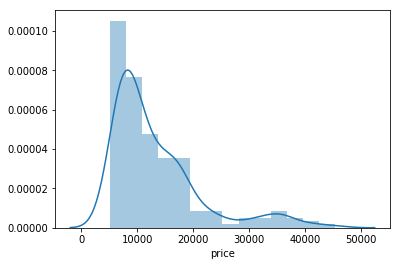

In [7]:
sns.distplot(df['price'])

In [8]:
df['price'].skew()

1.7663998888191028

In [9]:
df['price'].kurt()

2.948637293212561

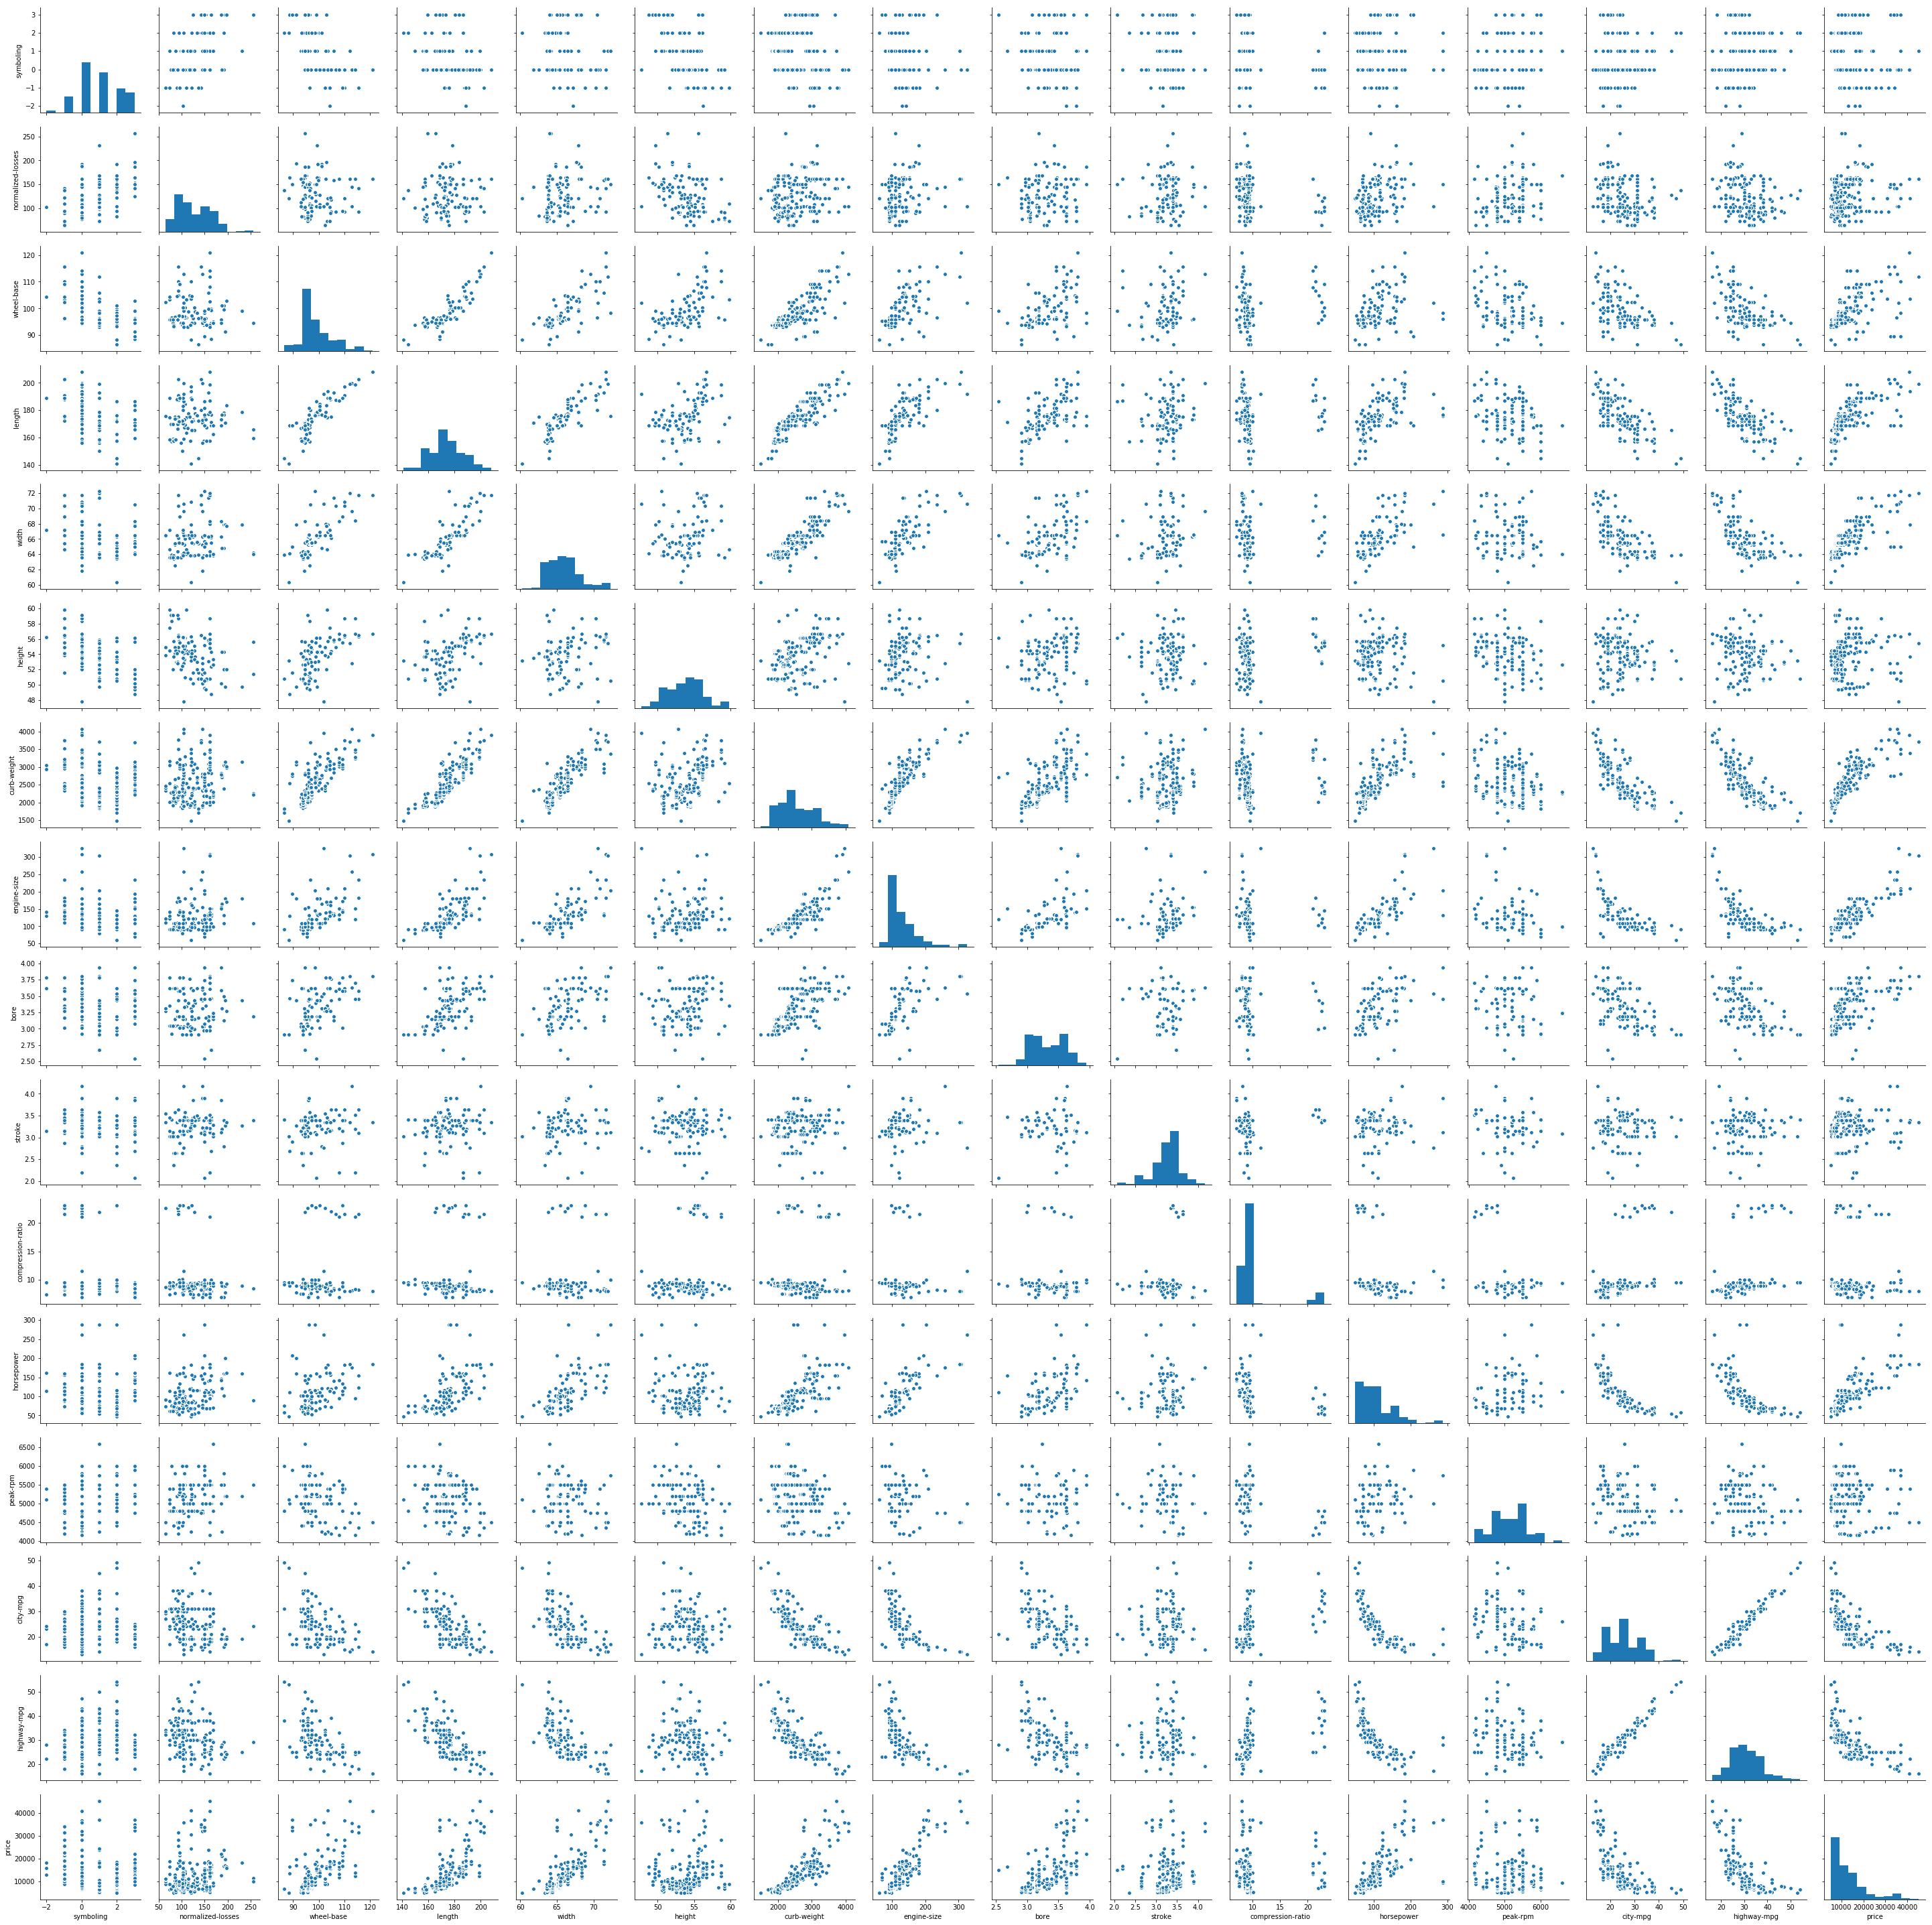

In [10]:
sns.pairplot(df)

<Figure size 720x720 with 0 Axes>

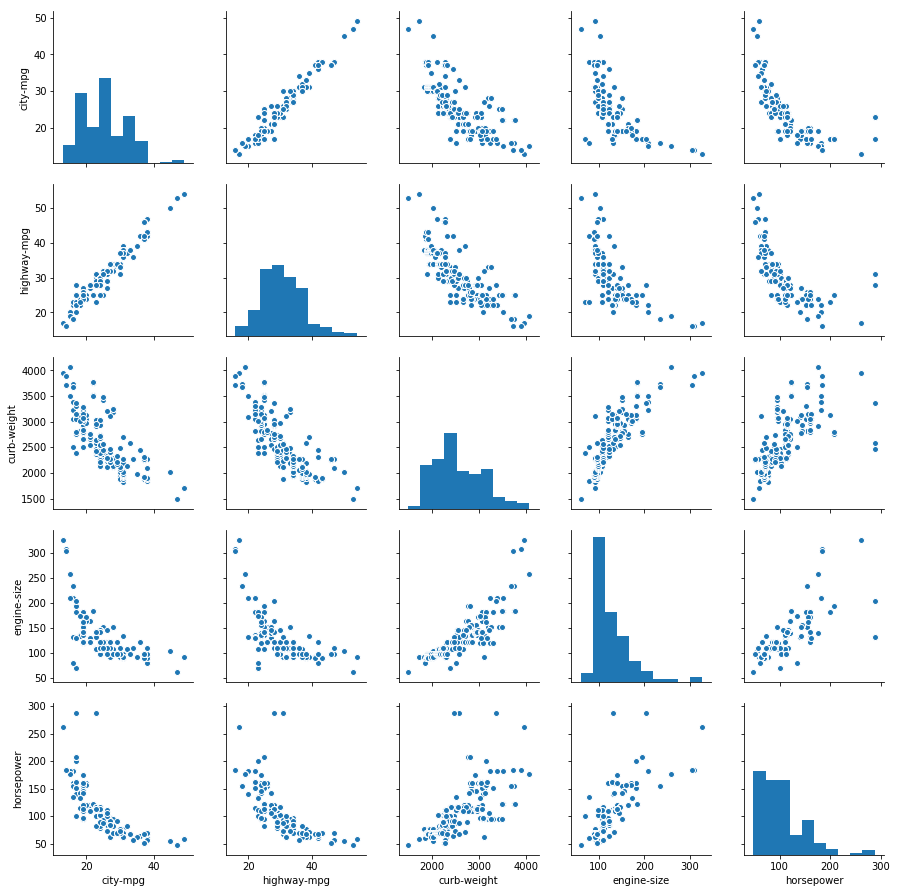

In [11]:
columns = ['city-mpg','highway-mpg','curb-weight', 'engine-size', 'horsepower']
plt.figure(figsize=(10,10),)
sns.pairplot(df[columns])

In [13]:
stats.ttest_ind(df['horsepower'], df['price'])

Ttest_indResult(statistic=-23.337064505286627, pvalue=3.909801820534587e-77)

In [14]:
stats.ttest_ind(df['highway-mpg'], df['city-mpg'])

Ttest_indResult(statistic=8.338312640543368, pvalue=1.1688699865371373e-15)